# 0. Cargar bibliotecas

In [66]:
# Librerías principales para análisis de datos
import pandas as pd              # Manejo de datos en estructuras tipo DataFrame (lectura, limpieza, transformación)
import numpy as np               # Operaciones numéricas y manejo de arrays eficientes

# Librerías para visualización
import seaborn as sns            # Visualizaciones estadísticas con gráficos elegantes y personalizables
import matplotlib.pyplot as plt  # Librería base de visualización en Python (gráficos de dispersión, barras, líneas, etc.)

# Librería para explorar valores faltantes
import missingno as msno         # Gráficos especiales para detectar y visualizar datos faltantes en el dataset

# Librerías para análisis estadístico
import statsmodels.api as sm     # Modelos estadísticos: regresión lineal, ANOVA, test F, p-values, intervalos de confianza
import scipy.stats as stats      # Funciones y pruebas estadísticas (Shapiro-Wilk, t-test, distribuciones, etc.)

# Librerías para Machine Learning
from sklearn.model_selection import train_test_split  # División de datos en entrenamiento y prueba
from sklearn.linear_model import LinearRegression     # Modelo de regresión lineal (enfoque predictivo)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Métricas de evaluación


# 1. Cargar los Datos

In [67]:

# Cargar el dataset desde un archivo CSV (cambia la ruta al archivo si es necesario)
data = pd.read_csv('PimaIndiansDiabetes2.csv')

# Verificar las primeras filas
data.head()



,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,pos
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,neg
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,pos
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,neg
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,pos


# 2. Análisis exploratorio de datos

In [68]:

# Eliminar las columnas 'insulin' y 'triceps'
data_cleaned = data.drop(columns=['insulin', 'triceps'])

# Eliminar filas con valores faltantes
data_cleaned = data_cleaned.dropna()

# Ver las dimensiones del nuevo dataset
print(f"Dimensiones de data_cleaned: {data_cleaned.shape}")

# Ver la estructura del nuevo dataset
print(f"Estructura de data_cleaned:")
print(data_cleaned.info())




Dimensiones de data_cleaned: (724, 7)
Estructura de data_cleaned:
<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  724 non-null    int64  
 1   glucose   724 non-null    float64
 2   pressure  724 non-null    float64
 3   mass      724 non-null    float64
 4   pedigree  724 non-null    float64
 5   age       724 non-null    int64  
 6   diabetes  724 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 45.2+ KB
None


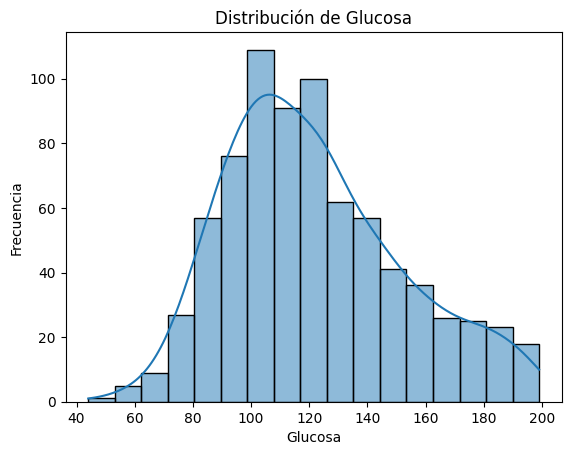

In [69]:

# Visualizar la distribución de una variable
sns.histplot(data['glucose'], kde=True)
plt.title("Distribución de Glucosa")
plt.xlabel("Glucosa")
plt.ylabel("Frecuencia")
plt.show()


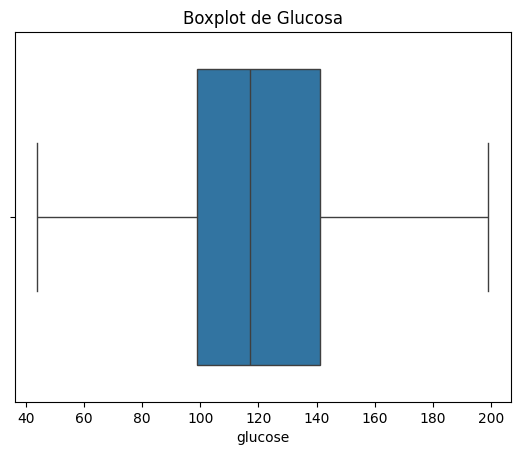

In [70]:
# Boxplot para detectar valores atípicos
sns.boxplot(x=data['glucose'])
plt.title("Boxplot de Glucosa")
plt.show()

In [71]:
# Convertir la columna 'diabetes' de texto ('pos', 'neg') a valores numéricos (1, 0)
data['diabetes'] = data['diabetes'].map({'pos': 1, 'neg': 0})

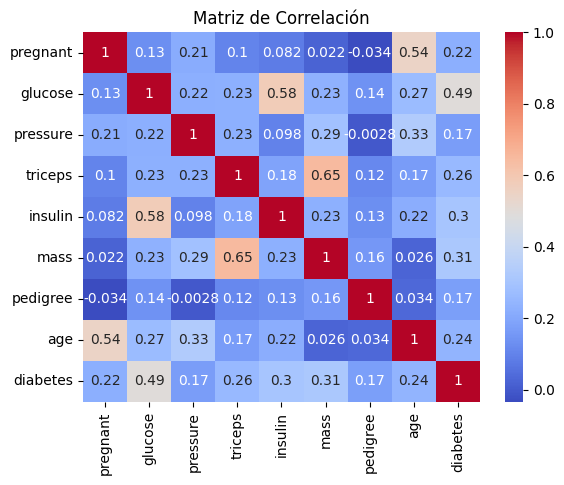

In [72]:

# Identificación de correlaciones
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# 3. Regresión Lineal

In [73]:
# Regresión Lineal Simple
# -----------------------

# ahora ajustamos un modelo de **regresión lineal simple** para predecir `glucose`
# a partir de `mass`. Esto ilustra el caso de una sola variable predictora.


# Definir característica (X) y variable objetivo (y)
X = data_cleaned[['mass']]
y = data_cleaned['glucose']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

# ejecutar el modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
# Predicciones
y_pred = lr.predict(X_test)

In [75]:
# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

MAE: 21.58
RMSE: 696.78
R^2: -0.02


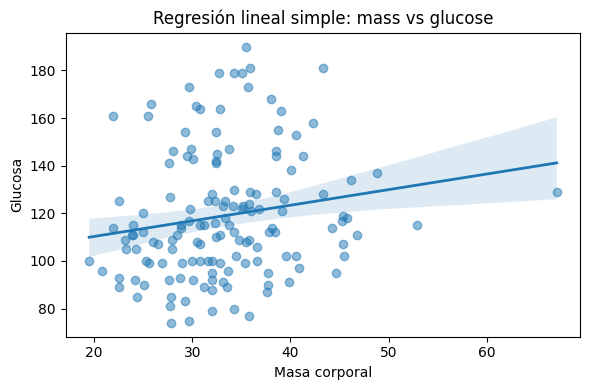

In [76]:
# Visualización de la regresión
plt.figure(figsize=(6,4))
sns.regplot(x=X_test['mass'], y=y_test, scatter_kws={'alpha':0.5}, line_kws={'linewidth':2})
plt.title('Regresión lineal simple: mass vs glucose')
plt.xlabel('Masa corporal')
plt.ylabel('Glucosa')
plt.tight_layout()
plt.show()

In [77]:
# Tabla de coeficientes
coef_df = pd.DataFrame({
    "Parámetro": ["Intercepto"] + list(X.columns),  # intercepto + nombres de variables
    "Estimación": [lr.intercept_] + list(lr.coef_)  # intercepto + coeficientes
})

display(coef_df)


,Parámetro,Estimación
0,Intercepto,86.951897
1,mass,1.104894


GLUCOSA = 86.95 + 1.10 MASS

# 3.1 Validación supuesto del modelo regresión lineal simple

**Supuestos EMCO para regresión simple**

In [78]:
# -------------------------------------------------------
# Ajuste con statsmodels (para análisis estadístico)
# -------------------------------------------------------
X_const = sm.add_constant(X)  # agregamos intercepto
modelo = sm.OLS(y, X_const).fit()

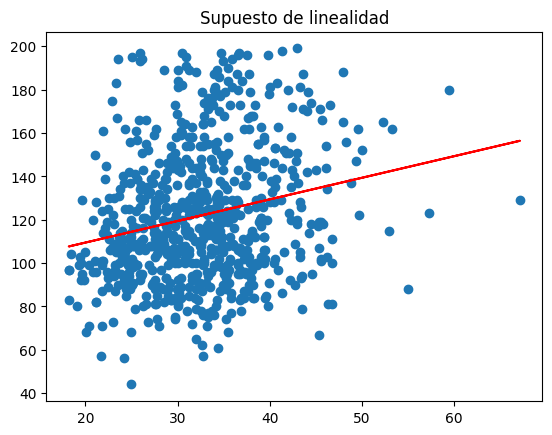

In [79]:
# 1. Linealidad: gráfico de dispersión + línea ajustada
#
# Si la línea ajustada sigue bien la nube de puntos → linealidad razonable.
#
plt.scatter(X, y)
plt.plot(X,modelo.predict(sm.add_constant(X)), color='red')
plt.title("Supuesto de linealidad")
plt.show()

In [80]:
#El supuesto de EMCO dice que la relación entre X e Y debe ser lineal.
#Aquí la relación es muy débil y posiblemente no lineal, lo que explica por qué tu R² es negativo.

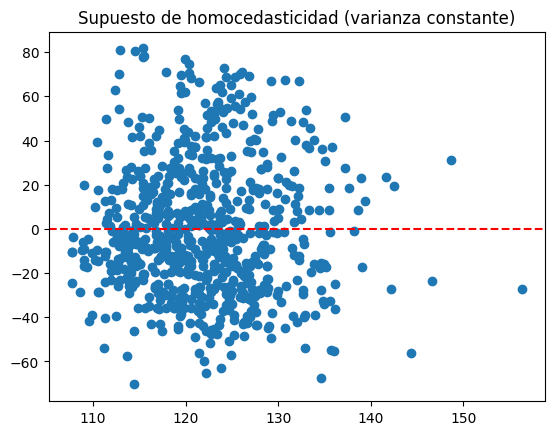

In [81]:
# 2. Homocedasticidad: residuos vs predicciones
#
#Si no hay patrón en el gráfico residuos vs predicciones → homocedasticidad cumplida.
#
residuos = modelo.resid
predicciones = modelo.fittedvalues
plt.scatter(predicciones, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Supuesto de homocedasticidad (varianza constante)")
plt.show()

In [82]:
# El supuesto de homocedasticidad se cumple razonablemente bien.
# El modelo presenta residuos que oscilan alrededor de 0 con varianza similar a lo largo de los valores ajustados.
# Sin embargo, la gran dispersión confirma que mass explica poco glucose (coherente con tu R² ≈ 0)

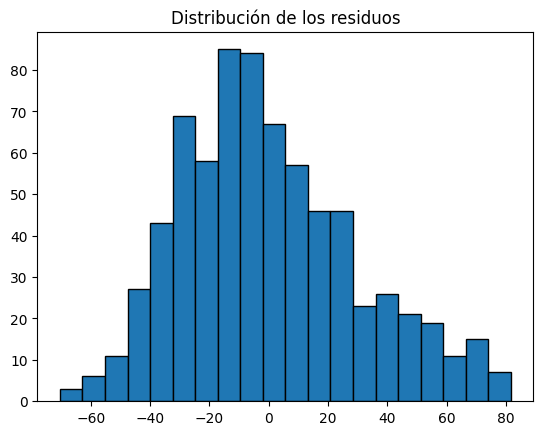

Shapiro-Wilk p-value: 3.2157816150930815e-09


In [83]:
# 3. Normalidad de los errores: histograma y prueba estadística
#
# Si p-value Shapiro > 0.05 → no se rechaza normalidad.
#
plt.hist(residuos, bins=20, edgecolor='black')
plt.title("Distribución de los residuos")
plt.show()

# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)

In [84]:
# Los residuos se concentran en torno a 0, pero no siguen perfectamente una forma de campana.
# Se observa cierta asimetría a la derecha (cola más larga hacia valores positivos).
# También se notan colas más pesadas que las de una distribución normal ideal.

# El p-value es extremadamente pequeño: 3.2e-09 < 0.05.
# Esto significa que rechazamos la hipótesis nula de normalidad.
# En conclusión, los residuos no son normales.

# El supuesto de normalidad de los errores del EMCO no se cumple.
# Esto puede deberse a:
# Outliers en la variable glucose.
# Relación no lineal entre mass y glucose.
# Que mass simplemente no sea un predictor relevante de glucose.

In [85]:
# 4. Autocorrelación (Durbin-Watson)
#
# Durbin-Watson cercano a 2 → no autocorrelación.
#
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuos)
print("Durbin-Watson:", dw)

Durbin-Watson: 1.9283211411305698


In [86]:
# El valor obtenido es Durbin-Watson = 1.93.
# El estadístico DW varía entre 0 y 4:
# ≈ 2 → no hay autocorrelación.
# < 2 (cercano a 0) → indica autocorrelación positiva.
# > 2 (cercano a 4) → indica autocorrelación negativa.
# En este caso, 1.93 está muy cerca de 2, por lo que no se detecta autocorrelación.

**Conclusiones :**

Hasta ahora:


*   Linealidad → débil (relación poco clara).
*   Homoscedasticidad → razonablemente cumplida.
*   Normalidad → no cumplida (residuos no normales).
*   Independencia de errores (DW) → cumplida.

 El modelo de regresión simple con mass como predictor no viola gravemente homocedasticidad ni autocorrelación, pero falla en linealidad y normalidad, confirmando que no es un buen predictor de glucose por sí solo.

# 4. Regresión lineal múltiple

In [87]:
# Regresión Lineal Múltiple
# -------------------------

# Convertir columna categórica diabetes a numérica
data_cleaned['diabetes'] = data_cleaned['diabetes'].map({'neg': 0, 'pos': 1})

# Definir variables predictoras (todas excepto glucose)
X = data_cleaned.drop(columns=['glucose'])
y = data_cleaned['glucose']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)



In [88]:
# Ajustar modelo
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)



LinearRegression()

In [89]:
# Predicciones
y_pred = lr_multi.predict(X_test)


In [90]:
# --------------------------
# Métricas de evaluación
# --------------------------
print("Métricas en test:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

Métricas en test:
R²: 0.10450949029273526
MAE: 20.576562275616435
RMSE: 24.780472339882348


In [91]:
# --------------------------
# Coeficientes del modelo
# --------------------------
print("\nIntercepto:", lr_multi.intercept_)
print("Coeficientes:")

for col, coef in zip(X.columns, lr_multi.coef_):
    print(f"{col}: {coef}")


Intercepto: 71.63478172881717
Coeficientes:
pregnant: -0.7616453318061751
pressure: 0.24836078229536984
mass: 0.323805736735428
pedigree: 5.008059091372377
age: 0.3877686395572503
diabetes: 30.33426861409934


In [92]:
# Definir X e y (mismo dataset usado con scikit-learn)
X = data_cleaned.drop(columns=['glucose'])
y = data_cleaned['glucose']

# Agregar constante para el intercepto
X_const = sm.add_constant(X)

# Ajustar modelo con OLS (Mínimos Cuadrados Ordinarios)
modelo_sm = sm.OLS(y, X_const).fit()

# Mostrar resumen completo (incluye test F global)
print(modelo_sm.summary())

# --------------------------
# Interpretación del test F
# --------------------------
# En la tabla, busca:
#  - 'F-statistic': valor del estadístico F
#  - 'Prob (F-statistic)': valor p asociado
#
# Decisión:
# Si Prob (F-statistic) < 0.05  ==> rechazamos H0:
#   H0: todos los coeficientes β = 0 (el modelo no tiene capacidad explicativa)
#   H1: al menos un coeficiente β ≠ 0
#
# Entonces, si p-value < 0.05 => el modelo es globalmente significativo.


                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     46.70
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           2.27e-48
Time:                        13:54:23   Log-Likelihood:                -3387.7
No. Observations:                 724   AIC:                             6789.
Df Residuals:                     717   BIC:                             6822.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5194      6.912     10.492      0.0

In [93]:
# TEST F

# F-statistic = 46.70
# Prob (F-statistic) = 2.27e-48


# El valor p < 0.05 (de hecho, es prácticamente cero) indica que rechazamos la Hipótesis nula
# Por lo tanto, el modelo múltiple es globalmente significativo: al menos uno de los predictores
# (por ejemplo diabetes, age, pressure) sí aporta a la explicación de la glucosa.

# VALOR DE R^2

# En statsmodels se usaron todas las observaciones disponibles tras el dropna() (724 casos).
# En scikit-learn, el R² se calculó sobre el conjunto de test (20% de los datos, ~145 casos).
# Así, Statsmodels → da el R² “de entrenamiento”.
# y Scikit-learn →  da el R² “de validación”.
# Por eso el de statsmodels es más alto (0.28 vs 0.10).

# CONCLUSION

# El test F te dice que el modelo globalmente es útil.
# El R² más bajo en scikit-learn refleja el desempeño real en datos nuevos (validación/test).

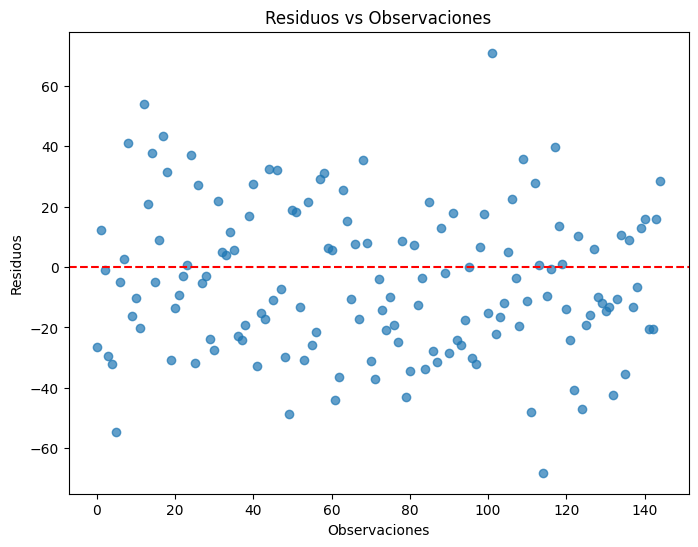

In [94]:
# Calcular residuos a partir del modelo scikit-learn
residuals = y_test - y_pred

# Gráfico de residuos
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Observaciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Observaciones')
plt.show()

In [95]:
# El gráfico muestra que el modelo múltiple no tiene un sesgo fuerte ni heterocedasticidad marcada,
# el supuesto de homocedasticidad parece cumplirse razonablemente (la varianza de los residuos es más o menos constante).
# Sí presenta errores grandes y outliers. Esto indica que, aunque el modelo es
# estadísticamente significativo (test F), su poder predictivo sigue siendo limitado.

# 5. Análisis de Componentes Principales

Proporción de varianza explicada por cada componente:  [0.33177801 0.21698198 0.16145524 0.12582062 0.09447428 0.06948988]


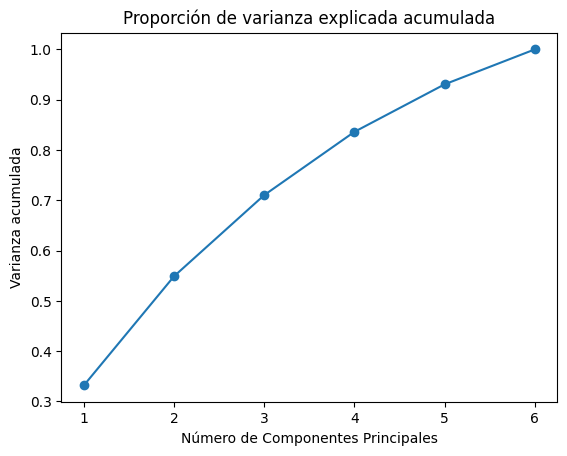

In [96]:
# Ahora aplicar PCA sobre los datos limpios
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# OJO: quitamos la columna target (glucose) y mantenemos todas las predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Proporción de varianza explicada por cada componente
pve = pca.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente: ", pve)

# Visualizar el gráfico de varianza acumulada
plt.plot(range(1, len(pve)+1), np.cumsum(pve), marker='o')
plt.title("Proporción de varianza explicada acumulada")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza acumulada")
plt.show()


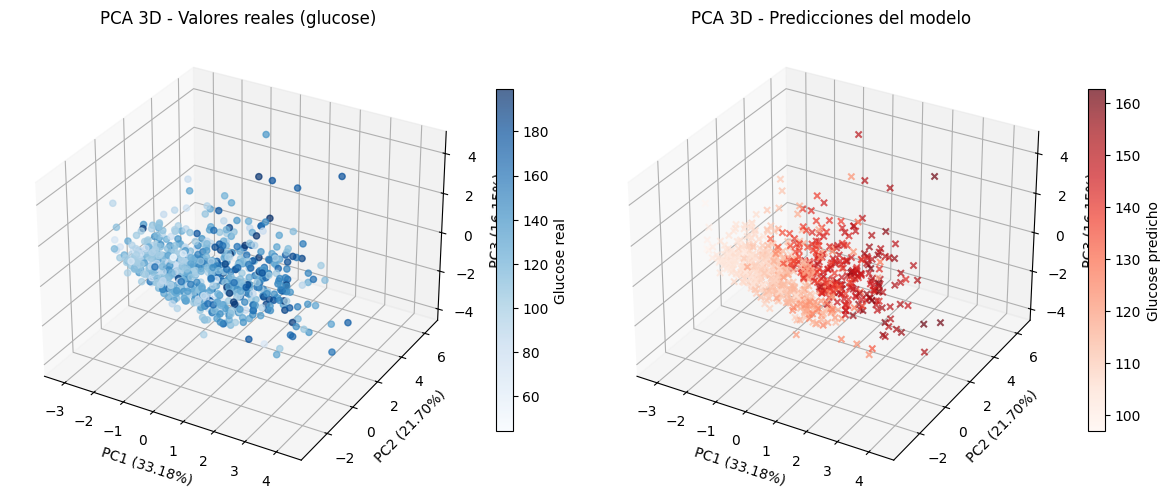

In [97]:
from mpl_toolkits.mplot3d import Axes3D

y_pred = lr_multi.predict(X)   # predicciones sobre todo el dataset


fig = plt.figure(figsize=(12, 6))

# Valores reales
ax1 = fig.add_subplot(121, projection='3d')
p1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                 c=y, cmap='Blues', alpha=0.7)
ax1.set_title("PCA 3D - Valores reales (glucose)")
ax1.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
ax1.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
ax1.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)")
fig.colorbar(p1, ax=ax1, shrink=0.6, label="Glucose real")

# Predicciones
ax2 = fig.add_subplot(122, projection='3d')
p2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                 c=y_pred, cmap='Reds', alpha=0.7, marker='x')
ax2.set_title("PCA 3D - Predicciones del modelo")
ax2.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
ax2.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
ax2.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)")
fig.colorbar(p2, ax=ax2, shrink=0.6, label="Glucose predicho")

plt.tight_layout()
plt.show()
